### Import modules

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image

### Read in the food choice data

In [2]:
# Read in data
food = pd.read_csv('food_choice.csv', sep=',')
food.head()

,Timestamp,age,city,weight,height,BMI,salary,gender,qualification,employment_status,covid_vaccine,marital_status,copilot_user,favourite_dish
0,11/12/2022 12:48:13,31.0,Karachi,73.0,165.0,26.8,10000.0,Male,Bachelors,Self Emplyed,Yes,Married,Yes,Biryani
1,11/12/2022 12:48:15,21.0,Turkey,70.0,170.0,24.9,3000.0,Male,Intermediate,Unemployed,Yes,Other,Yes,Biryani
2,11/12/2022 12:48:16,41.0,Faisalabad,72.5,156.0,31.2,35000.0,Male,Bachelors,Employed,Yes,Single,Yes,Daal
3,11/12/2022 12:48:24,22.0,Rawalpindi,75.0,155.0,32.0,50000.0,Male,Bachelors,Self Emplyed,Yes,Single,Yes,Karahi Ghosht
4,11/12/2022 12:48:25,26.0,Harbin,75.0,179.0,23.4,35000.0,Male,Masters,Unemployed,Yes,Single,No,Daal


In [3]:
# Check shape
food.shape

(90, 14)

### Data Cleaning

In [4]:
# delete irrelevant columns
food_df = food.drop(['Timestamp', 'copilot_user', 'covid_vaccine'], axis=1)
# Check new shape
print(food_df.shape)
food_df.head()

(90, 11)


,age,city,weight,height,BMI,salary,gender,qualification,employment_status,marital_status,favourite_dish
0,31.0,Karachi,73.0,165.0,26.8,10000.0,Male,Bachelors,Self Emplyed,Married,Biryani
1,21.0,Turkey,70.0,170.0,24.9,3000.0,Male,Intermediate,Unemployed,Other,Biryani
2,41.0,Faisalabad,72.5,156.0,31.2,35000.0,Male,Bachelors,Employed,Single,Daal
3,22.0,Rawalpindi,75.0,155.0,32.0,50000.0,Male,Bachelors,Self Emplyed,Single,Karahi Ghosht
4,26.0,Harbin,75.0,179.0,23.4,35000.0,Male,Masters,Unemployed,Single,Daal


#### Remove columns that are not relevant to the analysis

In [5]:
# Check for redundant rows and remove them
food_df.drop_duplicates()
# Check new shape
print(food_df.shape)

(90, 11)


#### Check for missing data and address it

In [6]:
# Check for missing data
food_df.isna().sum()

age                  0
city                 0
weight               0
height               0
BMI                  1
salary               0
gender               0
qualification        0
employment_status    0
marital_status       0
favourite_dish       0
dtype: int64

Only one data entry is missing in the BMI column. Since we have weight and height columns. BMI can be calculated. The BMI data is not accurate. A new column will be created for BMI and the old column will be dropped.
**BMI = Weight(Kg)/height(m)^2** 

In [7]:
# Calculate new BMI column
food_df[ 'BMI_new'] = round((food_df['weight']/(food_df['height']*0.01)**2),1)
food_df.head()

,age,city,weight,height,BMI,salary,gender,qualification,employment_status,marital_status,favourite_dish,BMI_new
0,31.0,Karachi,73.0,165.0,26.8,10000.0,Male,Bachelors,Self Emplyed,Married,Biryani,26.8
1,21.0,Turkey,70.0,170.0,24.9,3000.0,Male,Intermediate,Unemployed,Other,Biryani,24.2
2,41.0,Faisalabad,72.5,156.0,31.2,35000.0,Male,Bachelors,Employed,Single,Daal,29.8
3,22.0,Rawalpindi,75.0,155.0,32.0,50000.0,Male,Bachelors,Self Emplyed,Single,Karahi Ghosht,31.2
4,26.0,Harbin,75.0,179.0,23.4,35000.0,Male,Masters,Unemployed,Single,Daal,23.4


In [8]:
# drop BMI column
food_choice = food_df.drop(['BMI'], axis=1)
food_choice.head()

,age,city,weight,height,salary,gender,qualification,employment_status,marital_status,favourite_dish,BMI_new
0,31.0,Karachi,73.0,165.0,10000.0,Male,Bachelors,Self Emplyed,Married,Biryani,26.8
1,21.0,Turkey,70.0,170.0,3000.0,Male,Intermediate,Unemployed,Other,Biryani,24.2
2,41.0,Faisalabad,72.5,156.0,35000.0,Male,Bachelors,Employed,Single,Daal,29.8
3,22.0,Rawalpindi,75.0,155.0,50000.0,Male,Bachelors,Self Emplyed,Single,Karahi Ghosht,31.2
4,26.0,Harbin,75.0,179.0,35000.0,Male,Masters,Unemployed,Single,Daal,23.4


In [9]:
# Check columns datatypes
food_choice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                90 non-null     float64
 1   city               90 non-null     object 
 2   weight             90 non-null     float64
 3   height             90 non-null     float64
 4   salary             90 non-null     float64
 5   gender             90 non-null     object 
 6   qualification      90 non-null     object 
 7   employment_status  90 non-null     object 
 8   marital_status     90 non-null     object 
 9   favourite_dish     90 non-null     object 
 10  BMI_new            90 non-null     float64
dtypes: float64(5), object(6)
memory usage: 7.9+ KB


In [10]:
# Change age to int type
food_choice['age'] = food_choice['age'].apply(np.int64)

In [11]:
# Check data summary
food_choice.describe()

,age,weight,height,salary,BMI_new
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,29.188889,71.973678,150.781580,49259.802444,1916.556667
std,7.235826,18.938757,51.485629,62944.903517,6440.616847
min,18.000000,30.000000,5.000000,222.220000,9.000000
25%,23.000000,60.000000,156.600000,6250.000000,21.425000
50%,29.000000,70.100000,167.640000,26800.000000,25.900000
75%,34.000000,80.000000,175.000000,60000.000000,31.350000
max,55.000000,163.000000,204.216000,300000.000000,34400.000000


The  min height does not make sense, neither does the min and max BMI. All height below 100cm (1m) will be replaced with the average height (150.78). This will automatically address the BMI.

In [12]:
# Find heights below 100cm
wrong_height = food_choice[food_choice['height'] < 100]
wrong_height
# Replace heights below 100 with the average height of 150.78
food_choice['height'] = food_choice['height'].replace([5.6, 5.3, 5.8, 13.716, 5.0, 7.3, 5.8, 70.8, 8.5, 6.1, 64.34], 150.78)

# Update the columns used for BMI_new
food_choice[ 'BMI_new'] = round((food_choice['weight']/(food_choice['height']*0.01)**2),1)

In [13]:
# Check summary again
food_choice.describe()

,age,weight,height,salary,BMI_new
count,90.000000,90.000000,90.000000,90.000000,90.000000
mean,29.188889,71.973678,167.007402,49259.802444,26.087778
std,7.235826,18.938757,11.741341,62944.903517,7.374277
min,18.000000,30.000000,144.780000,222.220000,9.000000
25%,23.000000,60.000000,156.600000,6250.000000,21.300000
50%,29.000000,70.100000,167.640000,26800.000000,25.350000
75%,34.000000,80.000000,175.000000,60000.000000,28.625000
max,55.000000,163.000000,204.216000,300000.000000,56.400000


### Exploratory Data Analysis (EDA) 

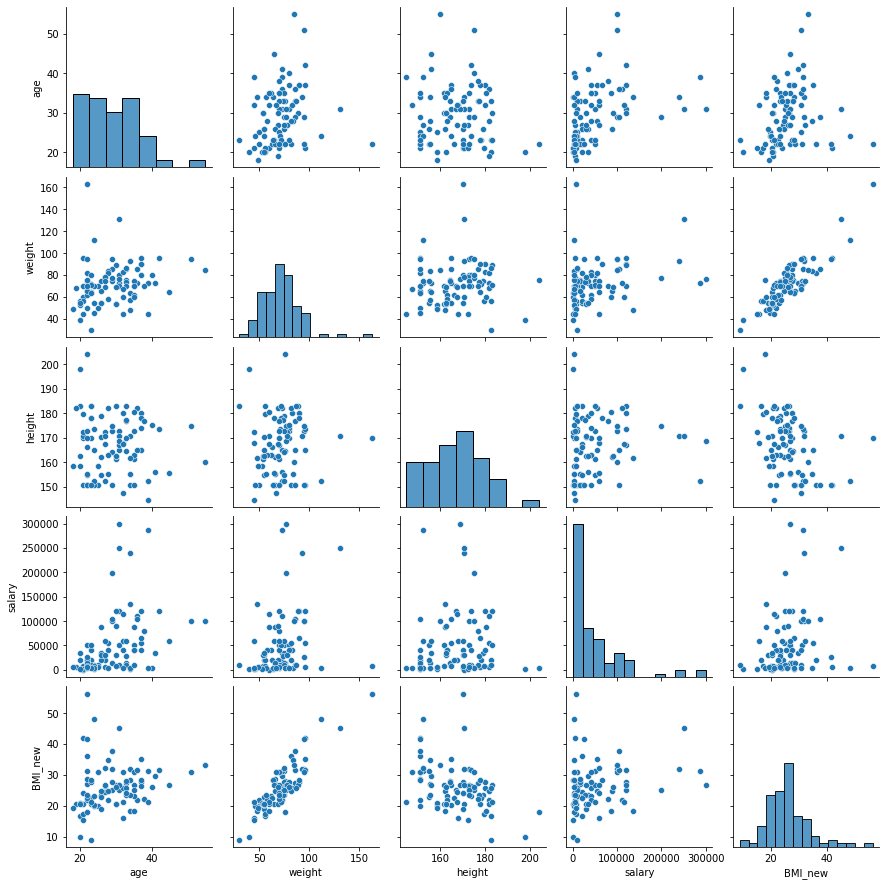

In [14]:
# compare all the columns in the data frame
sns.pairplot(food_choice)


#### Observations
There is somewhat of a positive relationship between age and weight,  age and salary. There is a strong relationship between BMI_new and weight.

#### How much do the participants weigh on average by gender?

gender
Female    62.546158
Male      74.496535
Name: weight, dtype: float64


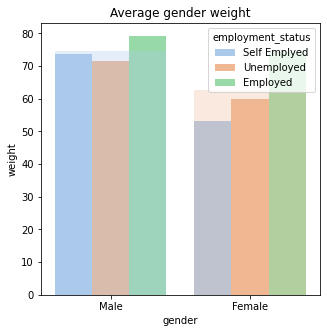

In [16]:
# group data by gender, and determine average weight
data = food_choice.groupby('gender')['weight'].mean()
print(data)
# plot graph
with sns.color_palette('pastel'):
  plt.figure(figsize=(5,5))
  sns.barplot(x='gender',y='weight', data=food_choice, hue='employment_status', ci=None)
  sns.barplot(x='gender',y='weight', data=food_choice, ci=None, alpha=0.3)
  plt.title('Average gender weight')
  plt.show()
  plt.close()

Female participants weigh about 12kg less than the male participants on average. Employed participants weigh the most.

#### What is the height range of the participants?

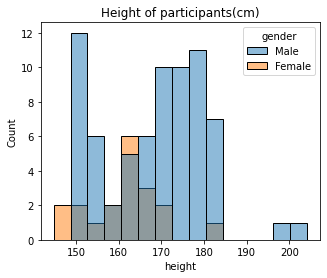

In [17]:
# plot graph
plt.figure(figsize=(5,4))
sns.histplot(x='height', data=food_choice, bins=15, hue='gender')
plt.title('Height of participants(cm)' )
plt.show()
plt.close()

Most men are between 170-180cm and women are between 160-170cm. 

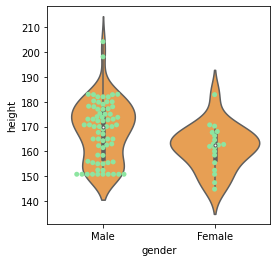

In [23]:
# plot graph to further analyse height data
with sns.color_palette('pastel'):
  plt.figure(figsize=(4,4))
  sns.swarmplot(x='gender', y='height', data=food_choice, color='#8de5a1')
  sns.violinplot(x='gender', y='height', data=food_choice, color='#ff9f3b')

Outliers for male participants are taller than 195cm and female outliers are taller than 180cm.

#### What is the age range of participants?

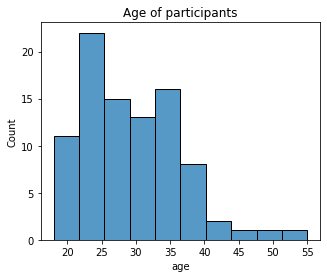

In [27]:
# plot graph to determine age range of participants
plt.figure(figsize=(5,4))
sns.histplot(x='age', data=food_choice, bins=10)
plt.title('Age of participants')
plt.show()
plt.close()

Most participants are 25 years of age or younger

#### What is the average salary by gender? does qualification matter?

gender
Female    62749.289474
Male      45649.939718
Name: salary, dtype: float64


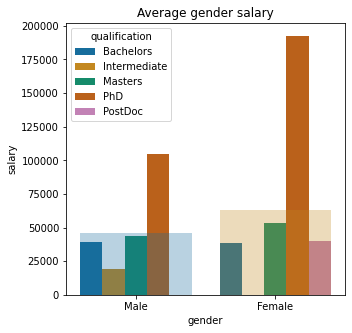

In [30]:
# Calculate average salary by gender
data = food_choice.groupby('gender')['salary'].mean()
print(data)
# plot graph
with sns.color_palette('colorblind'):
  plt.figure(figsize=(5,5))
  sns.barplot(x='gender', y='salary', data=food_choice, hue='qualification', ci=None)
  sns.barplot(x='gender', y='salary', data=food_choice, ci=None, alpha= 0.3)
  plt.title('Average gender salary')
  plt.show()
  plt.close()

Female participants on average earned more than the male participants by about 17000. Qualification appears to play a role, as those with PhD's have higher salaries.

#### Does marital status affect weight?

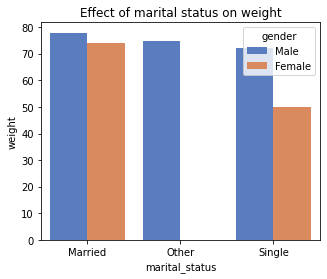

In [32]:
# plot graph to see relationship between marital status and weight
with sns.color_palette('muted'):
  plt.figure(figsize=(5,4))
  sns.barplot(x='marital_status', y='weight', data=food_choice, hue='gender', ci=None)
  plt.title('Effect of marital status on weight')
  plt.show()
  plt.close()

The married participants, seem to weigh more than the single participants

#### Does salary affect favourite dish?

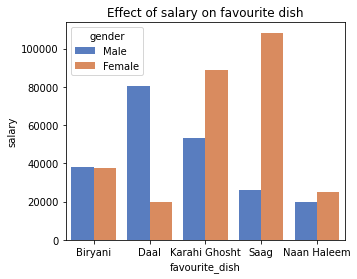

In [33]:
# plot graph
with sns.color_palette('muted'):
  plt.figure(figsize=(5,4))
  sns.barplot(x='favourite_dish', y='salary', data=food_choice, hue='gender', ci=None)
  plt.title('Effect of salary on favourite dish')
  plt.show()
  plt.close()

High female earners prefer Saag and Karahi Ghosht, while male high earners prefer Daal and Karahi Ghosht.

#### Which city pays more?

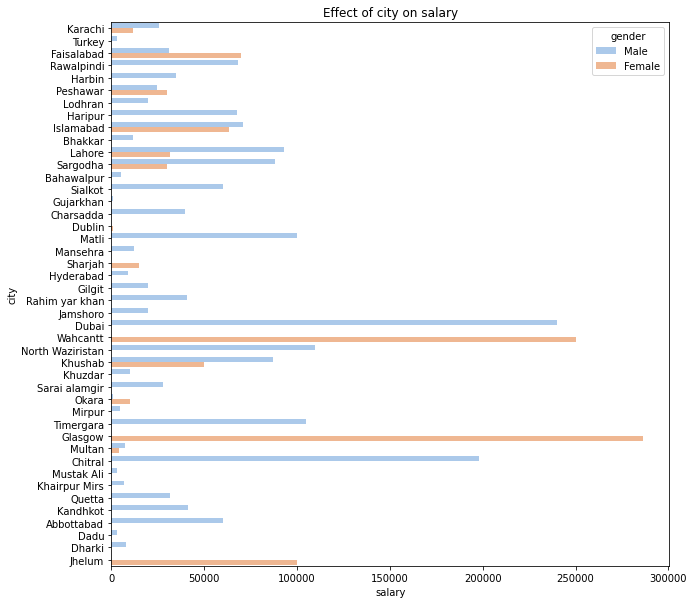

In [35]:
# plot graph
with sns.color_palette('pastel'):
  plt.figure(figsize=(10,10))
  sns.barplot(x='salary', y='city', data=food_choice, hue='gender', ci=None)
  plt.title('Effect of city on salary')
  plt.show()
  plt.close()

High earners can be found in Glasgow, Wahcantt and Dubai.

#### What is the relationship between, weight, age, salary, height, BMI?

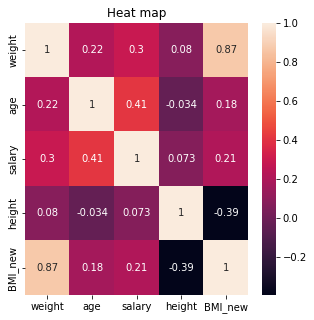

In [38]:
weight_age_salary_height_BMI = food_choice[['weight', 'age', 'salary', 'height', 'BMI_new']]
# Plot heat map
plt.figure(figsize=(5,5))
corr_coeff_mat = weight_age_salary_height_BMI.corr()
sns.heatmap(corr_coeff_mat, annot=True)
plt.title('Heat map')
plt.show()
plt.close()

The heatmap shows there is a moderate to weak positive correlation between salary and weight, salary and age and a high positive correlation between weight and BMI

#### Does age and location affect favourite dish choice?

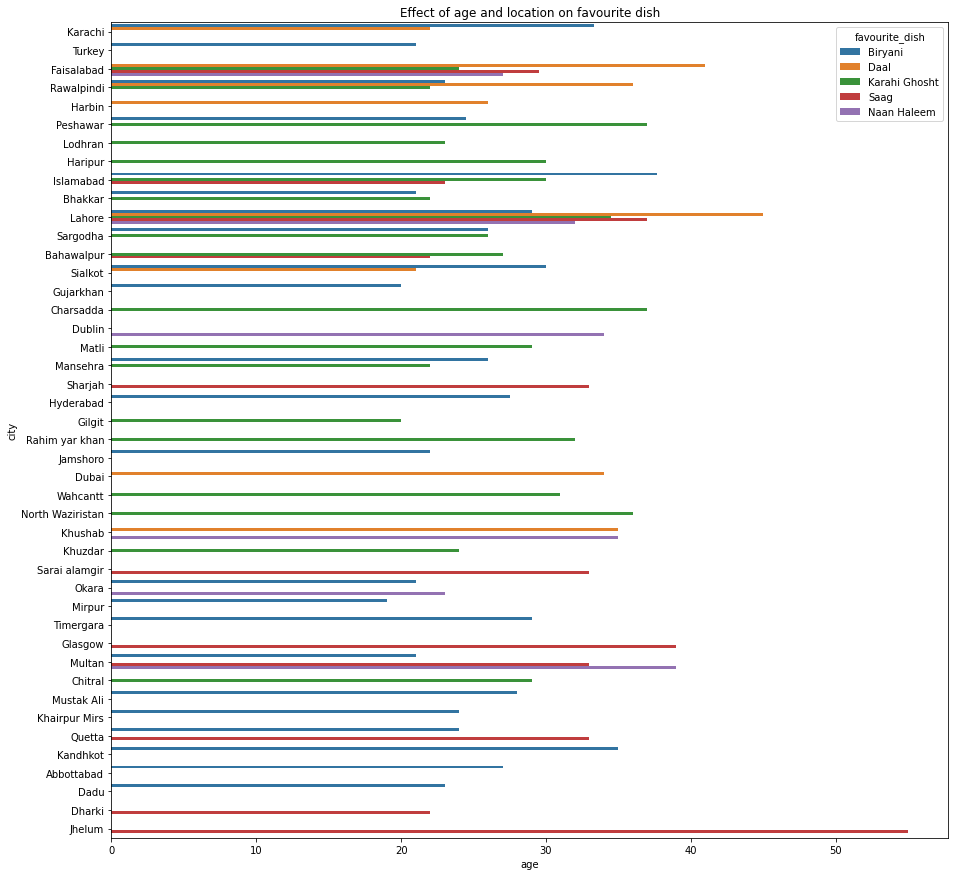

In [45]:
# plot graph
plt.figure(figsize=(15,15))
sns.barplot(x='age', y='city', data=food_choice, hue='favourite_dish', ci=None)
plt.title('Effect of age and location on favourite dish')
plt.show()
plt.close()

Biryani is more popluar in the younger group (under 30 years) and Saag and Daal is popular for those above 40 years of age in most cities.

#### Which food is popular amongs overweight participants?

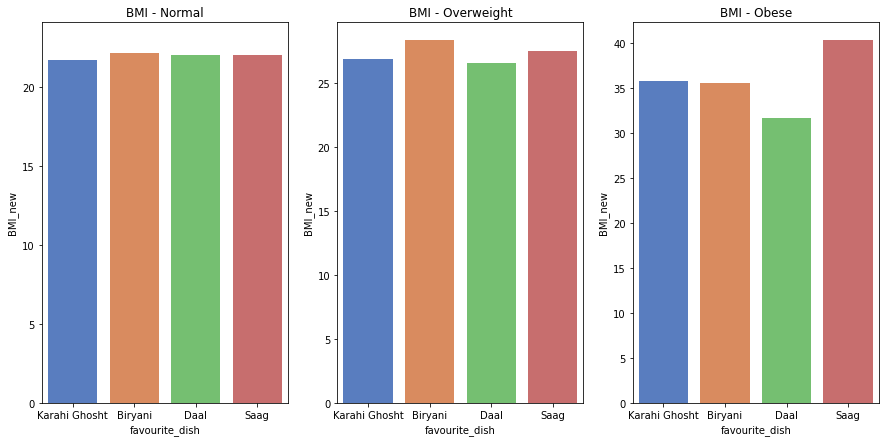

In [40]:
# filter data into normal, overweight and obese
normal = food_choice[(food_choice['BMI_new'] >= 18.5) & (food_choice['BMI_new'] < 25)]
over_weight = food_choice[(food_choice['BMI_new'] >= 25) & (food_choice['BMI_new'] < 30)]
obese = food_choice[food_choice['BMI_new'] >= 30]

# Plot all 3 BMI groups together
with sns.color_palette('muted'):
  fig, ax = plt.subplots(1,3, sharex=True, figsize=(15,7))
  sns.barplot(x='favourite_dish', y='BMI_new', data=normal, ci=None, ax=ax[0])
  sns.barplot(x='favourite_dish', y='BMI_new', data=over_weight, ci=None, ax=ax[1])
  sns.barplot(x='favourite_dish', y='BMI_new', data=obese, ci=None, ax=ax[2])
  ax[0].set_title('BMI - Normal')
  ax[1].set_title('BMI - Overweight')
  ax[2].set_title('BMI - Obese')


Normal BMI is 18.5-24.9, Overweight BMI is 25-29.9 obese BMB is above 30 (natureschoice.co.za).

Biryani is popular in the normal and overweight group and Saag is popular in the obese group

Favorite dish amongst participants?

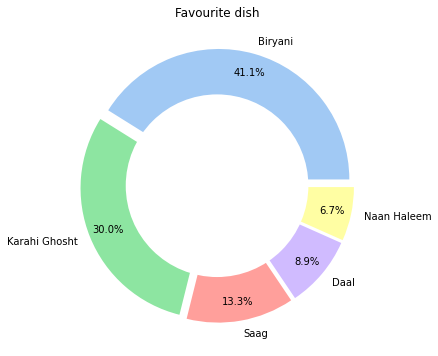

In [42]:
# Set image size
plt.figure(figsize=(6,6))
  
# Count each dish
food_count = food_choice['favourite_dish'].value_counts()

# Select colours for chart
colour = ['#a1c9f4', '#8de5a1', '#ff9f9b', '#d0bbff', '#fffea3']

# Select labels for the dishes
label = ['Biryani', 'Karahi Ghosht', 'Saag', 'Daal', 'Naan Haleem']

# explosion of sections in chart
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(food_count, labels= label, autopct='%1.1f%%', colors=colour, pctdistance=0.85, explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Favourite dish')
  
# Displaying Chart
plt.show()

#### Popular cities

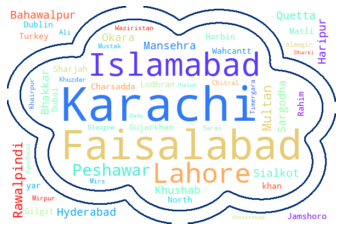

<Figure size 360x360 with 0 Axes>

In [44]:
#text from city
city = food_choice['city']
#Create visualisation
mask = np.array(Image.open("cloud_1.png"))
wordcloud = WordCloud(width = 500, height = 500, margin = 10, background_color='white', 
                      contour_color='#023075', contour_width=3, colormap='rainbow', mask=~mask).generate(' '.join(city))
#Display the generated image
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.figure(figsize=(5,5))
plt.show()

Most participanst live in Karachi and Faisalabad

### References

https://www.kaggle.com/datasets/abdulraheem625/food-choice-male-vs-female-indianpakistani-food

https://www.natureschoice.co.za/bmi-calculator/

https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/